In [77]:
import numpy as np                                  #importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


## Loading the dataset into python environment

In [78]:
titanic=pd.read_csv(r"C:\Users\Amby\Downloads\titanic_dataset.csv")

In [79]:
titanic.head()                   #displays first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Making ‘PassengerId’ as the index column

In [80]:
titanic=pd.read_csv(r"C:\Users\Amby\Downloads\titanic_dataset.csv",index_col='PassengerId')

In [81]:
titanic.head()                               

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking basic details of the dataset

In [82]:
titanic.shape                                      # shows the total no: of rows and columns of the dataset 

(891, 11)

In [83]:
titanic.info()                                     # shows the brief information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [84]:
titanic.describe()                   # displays the statistical information about the dataset 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
titanic['Survived'].value_counts()      # displays the count of unique values

0    549
1    342
Name: Survived, dtype: int64

In [86]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [87]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [88]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Missing Value Handling

In [89]:
titanic.isna().sum()                            # checks and displays the total no of missing values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Filling missing values with mean and mode for numerical column and categorical column respectively

In [90]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())    # filling the missing values with the median of the 'Age' data
for x in ['Cabin','Embarked']:
    titanic[x]=titanic[x].fillna(titanic[x].mode()[0])      # filling the missing values with mode of the categorical data

In [91]:
titanic.isna().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Checking for Outliers

In [92]:
titanic.columns                                #displays all the columns in the dataset

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

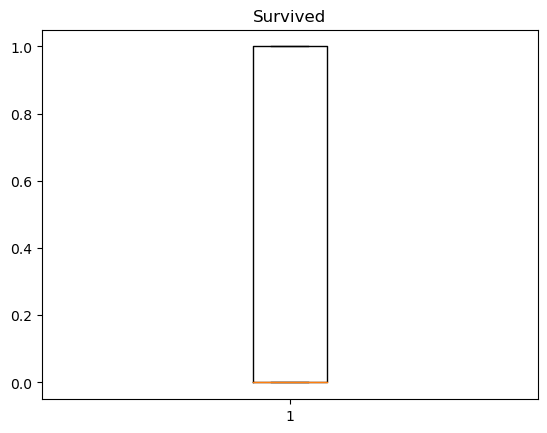

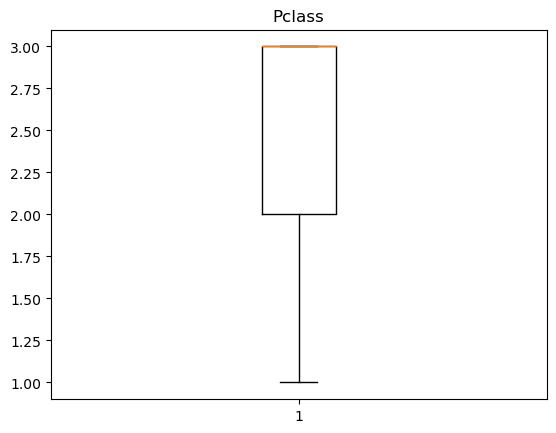

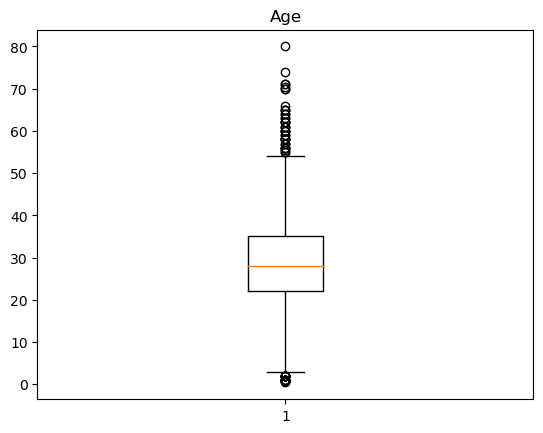

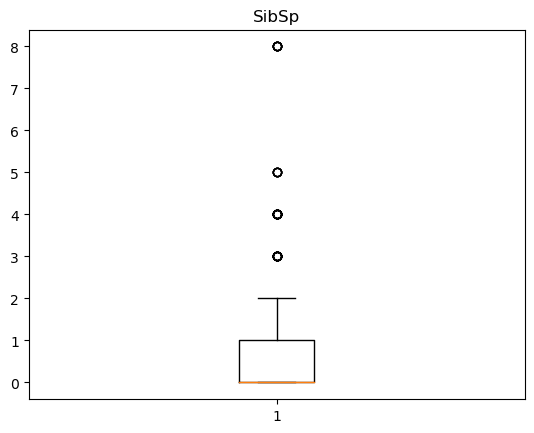

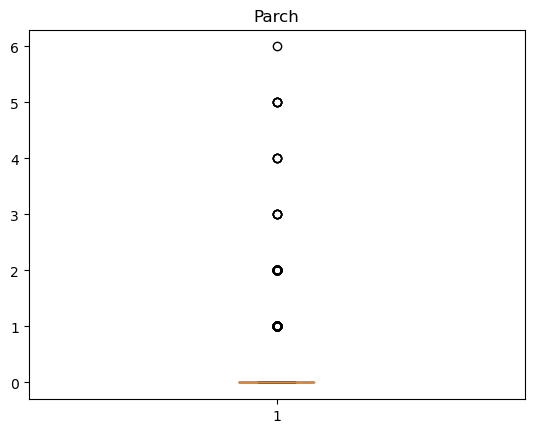

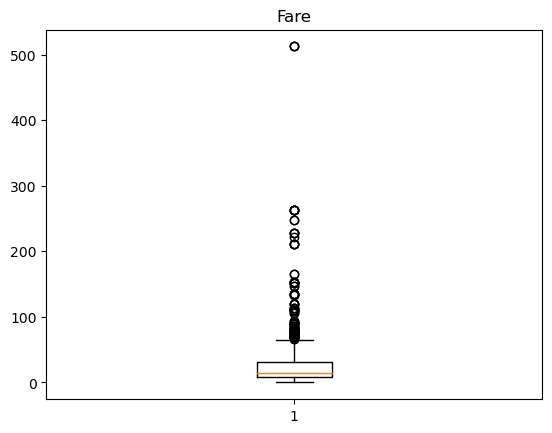

In [96]:
num_data=['Survived','Pclass','Age','SibSp','Parch','Fare']    
for i in num_data:                                    # plotting boxplots of all the numerical columns in the dataset
    plt.figure()
    plt.boxplot(titanic[i])
    plt.title(i)


### Outlier Handling of column 'SibSp'

In [98]:
Q1_s=np.percentile(titanic['SibSp'],25,interpolation='midpoint')     # finding first quartile
Q2_s=np.percentile(titanic['SibSp'],50,interpolation='midpoint')     #finding second quartile
Q3_s=np.percentile(titanic['SibSp'],75,interpolation='midpoint')     #finding third quartile
warnings.filterwarnings('ignore')

In [99]:
print(Q1_s)                                 #printing first,second and third quartiles
print(Q2_s)
print(Q3_s)

0.0
0.0
1.0


In [100]:
IQR_s=Q3_s-Q1_s                              # finding Inter Quartile Range(IQR)

In [101]:
print(IQR_s)                                #printing IQR

1.0


In [102]:
ulim_s=Q3_s+1.5*IQR_s                       #finding upper limit and lower limit
llim_s=Q1_s-1.5*IQR_s

In [103]:
print(ulim_s)                               #printing upper limit and lower limit
print(llim_s)

2.5
-1.5


In [104]:
outlier_s=[]                                #finding list of outliers
for s in titanic['SibSp']:
    if(s>ulim_s) or (s<llim_s):
        outlier_s.append(s)

In [105]:
print(outlier_s)                             # printing  list of outliers

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [106]:
ind1=titanic['SibSp']>ulim_s                  # finding the indices of outliers 
titanic.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [107]:
titanic.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,         # dropping the outliers
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

In [109]:
titanic.shape                                      # checking whether outliers are removed

(845, 11)

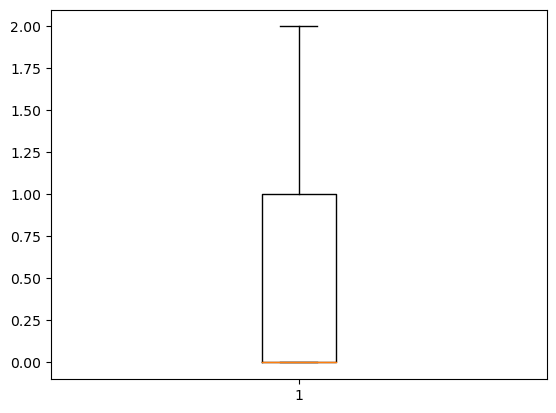

In [110]:
plt.boxplot(titanic['SibSp'])               
plt.show()

### Outlier Handling of column 'Fare'

In [111]:
Q1_f=np.percentile(titanic['Fare'],25,interpolation='midpoint')
Q2_f=np.percentile(titanic['Fare'],50,interpolation='midpoint')
Q3_f=np.percentile(titanic['Fare'],75,interpolation='midpoint')

In [112]:
print(Q1_f)
print(Q2_f)
print(Q3_f)

7.8958
13.0
30.0


In [113]:
IQR_f=Q3_f-Q1_f
print(IQR_f)

22.1042


In [114]:
ulim_f=Q3_f+1.5*IQR_f
llim_f=Q1_f-1.5*IQR_f

In [115]:
print(ulim_f)
print(llim_f)

63.1563
-25.2605


In [116]:
outlier_f=[]
for f in titanic['Fare']:
    if(f>ulim_f) or (f<llim_f):
        outlier_f.append(f)

In [117]:
print(outlier_f)

[71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 146.5208, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 153.4625, 133.65, 66.6, 134.5, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 80.0, 83.1583, 89.1042, 164.8667, 83.1583]


In [118]:
ind3=titanic['Fare']>ulim_f
ind_3=titanic.loc[ind3].index.tolist()
print(ind_3)

[2, 32, 35, 53, 62, 63, 73, 98, 103, 119, 121, 125, 140, 152, 196, 216, 219, 225, 231, 246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 326, 333, 335, 337, 338, 367, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 439, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 588, 592, 610, 616, 628, 642, 646, 656, 660, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 746, 755, 760, 764, 766, 780, 790, 803, 821, 830, 836, 850, 857, 880]


In [119]:
titanic.drop([2, 32, 35, 53, 62, 63, 73, 75, 93, 121, 140, 152, 170, 196, 216, 219, 225, 231, 246, 257, 258, 259, 270, 276, 291, 292, 307, 308, 310, 311, 326, 335, 337, 338, 367, 370, 371, 374, 376, 381, 386, 394, 413, 435, 454, 485, 487, 497, 505, 506, 510, 514, 521, 528, 538, 545, 558, 578, 592, 600, 610, 628, 642, 644, 646, 656, 661, 666, 682, 691, 693, 701, 709, 717, 731, 738, 742, 760, 766, 782, 790, 827, 830, 839, 850],inplace=True)

In [120]:
titanic.shape

(760, 11)

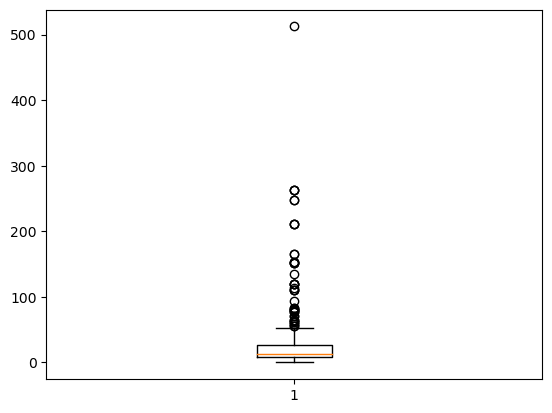

In [121]:
plt.boxplot(titanic['Fare'])
plt.show()

### Outlier Handling of column 'Age'

In [122]:
Q1_a=np.percentile(titanic['Age'],25,interpolation='midpoint')
Q2_a=np.percentile(titanic['Age'],50,interpolation='midpoint')
Q3_a=np.percentile(titanic['Age'],75,interpolation='midpoint')

In [123]:
print(Q1_a)
print(Q2_a)
print(Q3_a)

23.0
28.0
35.0


In [124]:
IQR_a=Q3_a-Q1_a
print(IQR_a)

12.0


In [125]:
ulim_a=Q3_a+1.5*IQR_a
llim_a=Q1_a-1.5*IQR_a

In [126]:
print(ulim_a)
print(llim_a)

53.0
5.0


In [127]:
outlier_a=[]
for a in titanic['Age']:
    if(a>ulim_a) or (a<llim_a):
        outlier_a.append(a)

In [128]:
print(outlier_a)

[54.0, 4.0, 58.0, 55.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 54.0, 55.5, 61.0, 1.0, 56.0, 1.0, 4.0, 3.0, 2.0, 59.0, 54.0, 62.0, 58.0, 65.0, 2.0, 0.92, 54.0, 61.0, 2.0, 3.0, 1.0, 3.0, 64.0, 4.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 54.0, 60.0, 4.0, 61.0, 57.0, 80.0, 0.75, 56.0, 58.0, 70.0, 60.0, 4.0, 60.0, 70.0, 4.0, 0.67, 57.0, 54.0, 1.0, 0.42, 1.0, 0.83, 74.0, 4.0, 56.0]


In [129]:
ind4=titanic['Age']>ulim_a
ind_l=titanic['Age']<llim_a
ind_4=titanic.loc[ind4].index.tolist()
ind_ll=titanic.loc[ind_l].index.tolist()
print(ind_4,ind_ll)

[7, 12, 16, 34, 55, 95, 97, 117, 125, 153, 171, 175, 233, 250, 253, 269, 281, 318, 327, 439, 457, 468, 484, 488, 493, 494, 546, 556, 571, 583, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 775, 852, 880] [11, 44, 79, 173, 184, 185, 194, 206, 298, 306, 341, 349, 382, 408, 446, 470, 480, 531, 619, 645, 692, 751, 756, 789, 804, 828, 832, 870]


In [130]:
titanic.drop([7, 12, 16, 34, 95, 97, 117, 151, 153, 171, 175, 178, 223, 233, 250, 253, 281, 318, 327, 407, 450, 457, 459, 461, 464, 468, 483, 484, 488, 493, 494, 527, 546, 556, 557, 571, 572, 583, 598, 626, 627, 631, 632, 648, 673, 695, 696, 713, 715, 724, 772, 773, 797, 852, 858, 863,778],inplace=True)

In [131]:
titanic.shape

(703, 11)

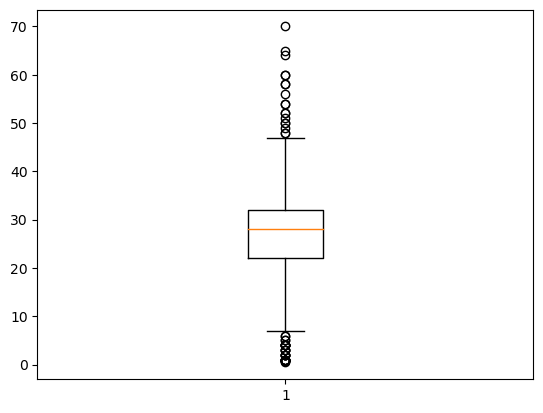

In [132]:
plt.boxplot(titanic['Age'])
plt.show()

## Min-Max Scaling

In [133]:
titanic.columns



Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [136]:
X=titanic.drop('Survived',axis=1)                    #creating a feature set excluding the 'Survived' column 
Y=titanic['Survived']                                #creating a target variable with 'Survived' column

In [135]:
X.describe()                                         # displays the statistical information of the X feature set  

,Pclass,Age,SibSp,Parch,Fare
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,2.446657,27.673073,0.301565,0.381223,22.936936
std,0.756500,10.290878,0.523069,0.825029,37.613949
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.891650
50%,3.000000,28.000000,0.000000,0.000000,11.500000
75%,3.000000,32.000000,1.000000,0.000000,26.000000
max,3.000000,70.000000,2.000000,6.000000,512.329200


In [137]:
X1=X.drop(['Name', 'Sex','Ticket','Cabin', 'Embarked'],axis=1) # creating a feature set by dropping all the categorical columns 

In [56]:
X1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583


In [57]:
X1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,2.446657,27.673073,0.301565,0.381223,22.936936
std,0.756500,10.290878,0.523069,0.825029,37.613949
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.891650
50%,3.000000,28.000000,0.000000,0.000000,11.500000
75%,3.000000,32.000000,1.000000,0.000000,26.000000
max,3.000000,70.000000,2.000000,6.000000,512.329200


In [138]:
from sklearn.preprocessing import MinMaxScaler  # importing MinMaxScaler from sklearn library

In [139]:
min_max=MinMaxScaler()                         

In [140]:
X1=min_max.fit_transform(X1)                    #Min-Max Scaling the feature set

In [141]:
type(X1)                                       #displays the datatype of the feature set

numpy.ndarray

In [142]:
X1=pd.DataFrame(X1,columns=['Pclass','Age', 'SibSp', 'Parch','Fare'])   # changing the output array to a dataframe

In [143]:
X1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,0.723329,0.391680,0.150782,0.063537,0.044770
std,0.378250,0.147900,0.261535,0.137505,0.073418
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.310147,0.000000,0.000000,0.015403
50%,1.000000,0.396378,0.000000,0.000000,0.022447
75%,1.000000,0.453866,0.500000,0.000000,0.050749
max,1.000000,1.000000,1.000000,1.000000,1.000000
